In [1]:
import os

os.environ["TUTORIAL_GRPC_PG_PORT"] = "2345"

In [2]:
from tutorial.grpc.geodatas.models.models import session, engine, Base
from sqlalchemy import Table

2019-02-23 01:52:29,708 INFO sqlalchemy.engine.base.Engine select version()
2019-02-23 01:52:29,708 INFO sqlalchemy.engine.base.Engine {}
2019-02-23 01:52:29,711 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-02-23 01:52:29,711 INFO sqlalchemy.engine.base.Engine {}
2019-02-23 01:52:29,714 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-02-23 01:52:29,715 INFO sqlalchemy.engine.base.Engine {}
2019-02-23 01:52:29,717 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-02-23 01:52:29,718 INFO sqlalchemy.engine.base.Engine {}
2019-02-23 01:52:29,720 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-02-23 01:52:29,720 INFO sqlalchemy.engine.base.Engine {}
2019-02-23 01:52:29,728 INFO sqlalchemy.engine.base.Engine 
            SELECT c.oid
            FROM pg_catalog.pg_class c
            LEFT JOIN pg_catalog.pg_namespace n ON n.oid = c.relnamespace
   

/root/.local/share/virtualenvs/2017_GRPC_Tutorial-oVeYm3ns/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
class OGRGeoJSON(Base):
    __table__ = Table('ogrgeojson', Base.metadata, autoload=True, autoload_with=engine)

In [4]:
list(session.query(OGRGeoJSON).limit(1))

2019-02-23 01:52:29,876 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-02-23 01:52:29,884 INFO sqlalchemy.engine.base.Engine SELECT ogrgeojson.ogc_fid AS ogrgeojson_ogc_fid, ogrgeojson.insee AS ogrgeojson_insee, ogrgeojson.nom AS ogrgeojson_nom, ogrgeojson.wikipedia AS ogrgeojson_wikipedia, ogrgeojson.surf_ha AS ogrgeojson_surf_ha, ST_AsEWKB(ogrgeojson.wkb_geometry) AS ogrgeojson_wkb_geometry 
FROM ogrgeojson 
 LIMIT %(param_1)s
2019-02-23 01:52:29,892 INFO sqlalchemy.engine.base.Engine {'param_1': 1}


In [16]:
from geoalchemy2 import Geography

from sqlalchemy import func

for rec in session.query(OGRGeoJSON).filter(func.ST_Contains(OGRGeoJSON.wkb_geometry,'SRID=4326;POINT(-61.08459149999999 14.7251042998748)')):
    print(rec.nom, rec.wikipedia, rec.insee)


2019-02-23 01:55:42,119 INFO sqlalchemy.engine.base.Engine SELECT ogrgeojson.ogc_fid AS ogrgeojson_ogc_fid, ogrgeojson.insee AS ogrgeojson_insee, ogrgeojson.nom AS ogrgeojson_nom, ogrgeojson.wikipedia AS ogrgeojson_wikipedia, ogrgeojson.surf_ha AS ogrgeojson_surf_ha, ST_AsEWKB(ogrgeojson.wkb_geometry) AS ogrgeojson_wkb_geometry 
FROM ogrgeojson 
WHERE ST_Contains(ogrgeojson.wkb_geometry, %(ST_Contains_1)s)
2019-02-23 01:55:42,122 INFO sqlalchemy.engine.base.Engine {'ST_Contains_1': 'SRID=4326;POINT(-61.08459149999999 14.7251042998748)'}
Fonds-Saint-Denis fr:Fonds-Saint-Denis 97208


In [20]:
import geopandas as gpd


gdf = gpd.read_postgis('''SELECT * from ogrgeojson LIMIT 6;''', engine, geom_col='wkb_geometry')
gdf.set_geometry('wkb_geometry')

2019-02-23 02:04:09,781 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2019-02-23 02:04:09,784 INFO sqlalchemy.engine.base.Engine {'name': 'SELECT * from ogrgeojson LIMIT 6;'}
2019-02-23 02:04:09,791 INFO sqlalchemy.engine.base.Engine SELECT * from ogrgeojson LIMIT 6;
2019-02-23 02:04:09,793 INFO sqlalchemy.engine.base.Engine {}


,ogc_fid,insee,nom,wikipedia,surf_ha,wkb_geometry
0,1,97223,Saint-Esprit,fr:Saint-Esprit (Martinique),2318,"POLYGON ((-60.9359504 14.58812009985865, -60.9..."
1,2,97233,Le Morne-Vert,fr:Le Morne-Vert,1325,POLYGON ((-61.12164679999998 14.71928299987411...
2,3,97208,Fonds-Saint-Denis,fr:Fonds-Saint-Denis,2374,POLYGON ((-61.13354679999998 14.74656889987732...
3,4,97224,Saint-Joseph,fr:Saint-Joseph (Martinique),4324,"POLYGON ((-61.08459149999999 14.7251042998748,..."
4,5,97212,Gros-Morne,fr:Gros-Morne,4601,"POLYGON ((-61.08459149999999 14.7251042998748,..."
5,6,97218,Le Morne-Rouge,fr:Le Morne-Rouge,3746,POLYGON ((-61.14847309999999 14.80605669988435...


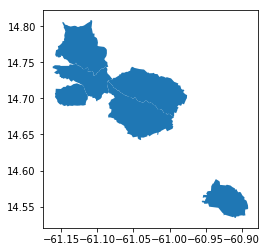

In [22]:
if not gdf.empty:
    gdf.plot()